#Step 4 
Optimization with uncertain conversion rates, 𝛼 ratios, and number of items sold per product

In [1]:
import copy

import numpy as np
import matplotlib.pyplot as plt


import Code.utils as utils
import Code.environment.settings as settings
from Code.environment.Environment import Environment
from Code.GreedyLearner import GreedyLearner
from Code.environment.Customer import Customer
from Code.UCBLearner import UCBLearner
from Code.TSLearner import TSLearner
from Code.UCBLearner4 import UCBLearner4
from Code.TSLearner4 import TSLearner4

%matplotlib inline

In [2]:
cust_json = "customer_classes.json"
today_customer = 50
var_cust = 0
p_lambda = 1.0
graph_json = "business_full_graph.json"

arms = settings.prices
environment = Environment(cust_json,today_customer,var_cust,p_lambda, graph_json, arms)
clairvoyant_arms, clairvoyant_reward, exp_c, rew_per_arm= environment.estimate_clairvoyant()
print("\n", clairvoyant_arms, clairvoyant_reward, exp_c, rew_per_arm.values())

loading: [                              ] 0.0%
loading: [=                             ] 1.0%
loading: [=                             ] 2.0%
loading: [=                             ] 2.9%
loading: [==                            ] 3.9%
loading: [==                            ] 4.9%
loading: [==                            ] 5.9%
loading: [===                           ] 6.8%
loading: [===                           ] 7.8%
loading: [===                           ] 8.8%
loading: [===                           ] 9.8%
loading: [====                          ] 10.7%
loading: [====                          ] 11.7%
loading: [====                          ] 12.7%
loading: [=====                         ] 13.7%
loading: [=====                         ] 14.6%
loading: [=====                         ] 15.6%
loading: [=====                         ] 16.6%
loading: [======                        ] 17.6%
loading: [======                        ] 18.6%
loading: [======                        ] 19.5%
loa

In [3]:
n_arms = 4
n_products = 5 

feature1 = 0
feature2 = 0

customer = Customer(feature1, feature2)

TIME_HORIZON = 300
NUM_ITERATION = 1

In [4]:
#unknown parameters
alphas = np.array([0.2, 0.2, 0.2, 0.2, 0.2]) #uniform
prods_dist = np.ones((n_products,n_arms))   #all 1

customers = copy.deepcopy(environment.customers)

for customer in customers:
    customer.set_distribution_alpha(alphas)
    customer.set_num_prods(prods_dist)

UCB

In [5]:
rewards_iterations = []
for i in range(NUM_ITERATION):
    ucb4_learner = UCBLearner4(n_arms, n_products, customers, graph_json, arms, environment.customers_distribution, debug=True)
    print('Iteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        super_arm = ucb4_learner.select_superarm()
        report = environment.round(super_arm)
        ucb4_learner.update(super_arm.copy(), report)
    rewards = ucb4_learner.history_rewards
    rewards_iterations.append(np.array(rewards))
rewards_iterations = np.array(rewards_iterations)
rewards_iterations.shape

Iteration # 1
loading: [                              ] 0.0%
customer alpha: [0.2 0.2 0.2 0.2 0.2]
customer alpha: [0.42 0.18 0.16 0.06 0.18]
customer alpha: [0.36 0.25 0.15 0.07 0.17]
customer alpha: [0.32 0.2  0.18 0.08 0.22]
customer alpha: [0.315 0.225 0.16  0.1   0.2  ]
customer alpha: [0.304 0.208 0.184 0.1   0.204]
customer alpha: [0.30666667 0.20666667 0.19       0.09666667 0.2       ]
customer alpha: [0.3        0.20857143 0.20285714 0.08857143 0.2       ]
customer alpha: [0.29   0.215  0.21   0.0925 0.1925]
customer alpha: [0.29333333 0.21333333 0.20444444 0.09555556 0.19333333]
loading: [=                             ] 3.3%
customer alpha: [0.286 0.228 0.196 0.09  0.2  ]
customer alpha: [0.28181818 0.22727273 0.18909091 0.1        0.20181818]
customer alpha: [0.275      0.23666667 0.19       0.1        0.19833333]
customer alpha: [0.27384615 0.24307692 0.18615385 0.1        0.19692308]
customer alpha: [0.28142857 0.24142857 0.18285714 0.10285714 0.19142857]
customer alpha: [

(1, 300)

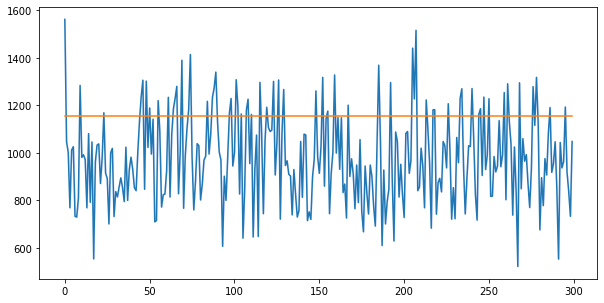

In [6]:
plt.figure(figsize=(10, 5))
mean = np.mean(rewards_iterations, axis=0)
stdev = np.std(rewards_iterations, axis=0)

plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)

plt.plot([_ for _ in range(len(rewards))], [clairvoyant_reward for _ in range(len(rewards))])
plt.show()

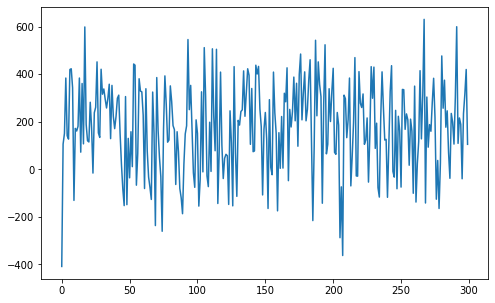

In [7]:
plt.figure(figsize=(8,5))
regret = clairvoyant_reward - rewards_iterations 
mean_regret = np.mean(regret, axis=0)

plt.plot(range(len(mean_regret)), mean_regret)
plt.show()

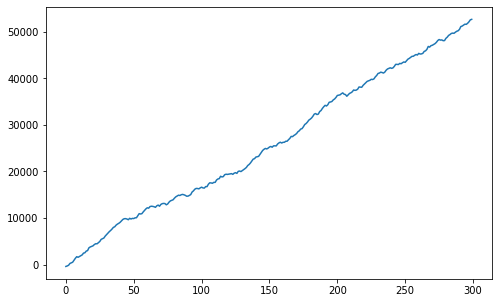

In [8]:
plt.figure(figsize=(8,5))
regret = clairvoyant_reward - rewards_iterations 
cumulative_regret = np.cumsum(regret, axis=1)
cum_reg_mean = np.mean(cumulative_regret, axis=0)

plt.plot(range(len(cum_reg_mean)), cum_reg_mean)
plt.show()

TS

In [9]:
rewards_iterations = []
for i in range(NUM_ITERATION):
    ts_learner4 = TSLearner4(n_arms, n_products, customers, graph_json, arms, environment.customers_distribution)
    print('\nIteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        super_arm = ts_learner4.select_superarm()
        report = environment.round(super_arm)
        ts_learner4.update(super_arm.copy(), report)
    rewards = ts_learner4.history_rewards
    rewards_iterations.append(np.array(rewards))
rewards_iterations = np.array(rewards_iterations)
rewards_iterations.shape


Iteration # 1
loading: [                              ] 0.0%
loading: [=                             ] 3.3%
loading: [==                            ] 6.7%
loading: [===                           ] 10.0%
loading: [====                          ] 13.3%


Process ForkPoolWorker-2727:
Process ForkPoolWorker-2725:
Process ForkPoolWorker-2724:
Process ForkPoolWorker-2723:
Process ForkPoolWorker-2722:
Process ForkPoolWorker-2721:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Process ForkPoolWorker-2726:
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(10, 5))
mean = np.mean(rewards_iterations, axis=0)
stdev = np.std(rewards_iterations, axis=0)

plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)

plt.plot([_ for _ in range(len(rewards))], [clairvoyant_reward for _ in range(len(rewards))])
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
regret = clairvoyant_reward - rewards_iterations 
mean_regret = np.mean(regret, axis=0)

plt.plot(range(len(mean_regret)), mean_regret)
plt.show()

In [ ]:
a = np.mean(regret[:,200:], axis=0)
np.shape(a)
print(np.mean(a))

In [ ]:
plt.figure(figsize=(8,5))
regret = clairvoyant_reward - rewards_iterations 
cumulative_regret = np.cumsum(regret, axis=1)
cum_reg_mean = np.mean(cumulative_regret, axis=0)

plt.plot(range(len(cum_reg_mean)), cum_reg_mean)
plt.show()